In [1]:
# Import for: Reading in fits file
from astropy.table import Table
from astropy.io import fits

# Import for: Downloading necessary files. (Not necessary if you choose to collect data from MAST)
from astroquery.mast import Observations

# Import for: Managing system variables and paths
from pathlib import Path

# Import for: Plotting and specifying plotting parameters
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
from IPython.display import display

# Import for: Quick Calculation and Data Analysis
import numpy as np
import pandas as pd
import math

# Import for operations on STIS Data
import stistools

import os

/Users/kding/miniconda3/envs/stis/lib/python3.7/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/Users/kding/miniconda3/envs/stis/lib/python3.7/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


In [2]:
# make directory for downloading data
datadir = Path('./data')
datadir.mkdir(exist_ok=True)

In [3]:
# Search target objscy by obs_id
target = Observations.query_criteria(obs_id='O5F301010')
# get a list of files assiciated with that target
FUV_list = Observations.get_product_list(target)
# Download only the SCIENCE fits files
Observations.download_products(FUV_list,extension='fits',download_dir=str(datadir))

INFO: Found cached file data/mastDownload/HST/o5f301010/o5f301010_crj.fits with expected size 10537920. [astroquery.query]
INFO: Found cached file data/mastDownload/HST/o5f301010/o5f301010_jif.fits with expected size 60480. [astroquery.query]
INFO: Found cached file data/mastDownload/HST/o5f301010/o5f301010_jit.fits with expected size 60480. [astroquery.query]
INFO: Found cached file data/mastDownload/HST/o5f301010/o5f301010_jwf.fits with expected size 17280. [astroquery.query]
INFO: Found cached file data/mastDownload/HST/o5f301010/o5f301010_jwt.fits with expected size 11520. [astroquery.query]
INFO: Found cached file data/mastDownload/HST/o5f301010/o5f301010_spt.fits with expected size 112320. [astroquery.query]
INFO: Found cached file data/mastDownload/HST/o5f301010/o5f301010_trl.fits with expected size 20160. [astroquery.query]
INFO: Found cached file data/mastDownload/HST/o5f301010/o5f301010_wav.fits with expected size 2260800. [astroquery.query]
INFO: Found cached file data/mastD

Local Path,Status,Message,URL
str50,str8,object,object
data/mastDownload/HST/o5f301010/o5f301010_crj.fits,COMPLETE,None,None
data/mastDownload/HST/o5f301010/o5f301010_jif.fits,COMPLETE,None,None
data/mastDownload/HST/o5f301010/o5f301010_jit.fits,COMPLETE,None,None
data/mastDownload/HST/o5f301010/o5f301010_jwf.fits,COMPLETE,None,None
data/mastDownload/HST/o5f301010/o5f301010_jwt.fits,COMPLETE,None,None
data/mastDownload/HST/o5f301010/o5f301010_spt.fits,COMPLETE,None,None
data/mastDownload/HST/o5f301010/o5f301010_trl.fits,COMPLETE,None,None
data/mastDownload/HST/o5f301010/o5f301010_wav.fits,COMPLETE,None,None
data/mastDownload/HST/o5f301010/o5f301010_wsp.fits,COMPLETE,None,None


In [3]:
raw = "o5f301010_raw.fits"
wav = "o5f301010_wav.fits"
flt = "o5f301010_flt.fits"

In [4]:
fits.getheader(raw)

SIMPLE  =                    T / data conform to FITS standard                  
BITPIX  =                   16 / bits per data value                            
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / File may contain standard extensions           
NEXTEND =                    6 / Number of standard extensions                  
GROUPS  =                    F / image is in group format                       
DATE    = '2022-04-15'         / date this file was written (yyyy-mm-dd)        
FILENAME= 'o5f301010_raw.fits                     ' / name of file              
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'STIS  '             / identifier for instrument used to acquire data 
EQUINOX =               2000

In [5]:
fits.info(raw)

Filename: o5f301010_raw.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     225   ()      
  1  SCI           1 ImageHDU       120   (1062, 1044)   int16 (rescales to uint16)   
  2  ERR           1 ImageHDU        62   ()      
  3  DQ            1 ImageHDU        45   ()      
  4  SCI           2 ImageHDU       120   (1062, 1044)   int16 (rescales to uint16)   
  5  ERR           2 ImageHDU        62   ()      
  6  DQ            2 ImageHDU        47   ()      


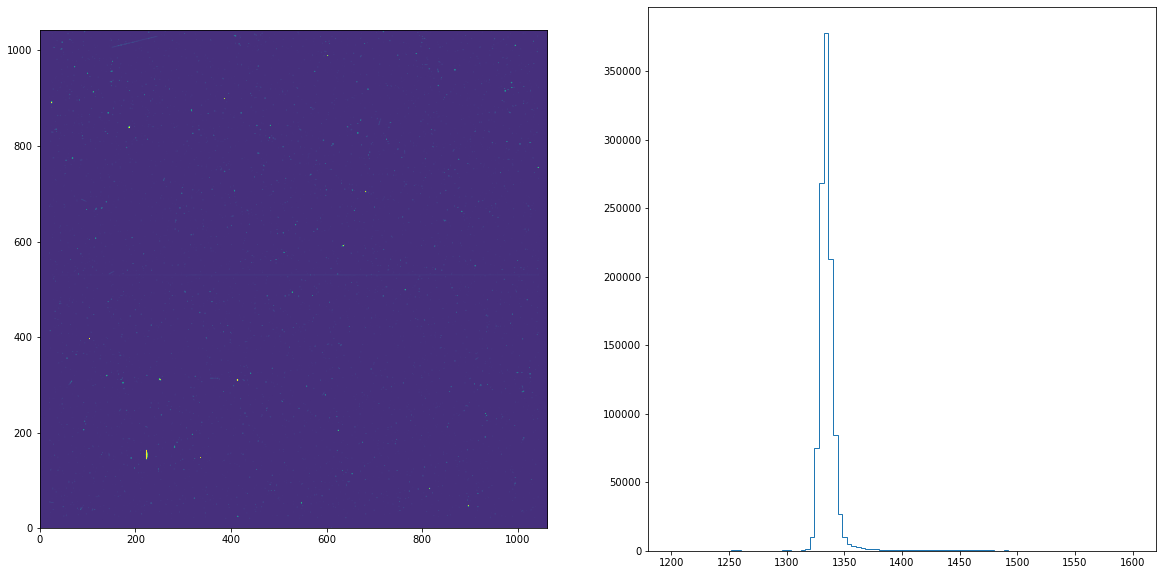

In [6]:
matplotlib.rcParams['figure.figsize'] = (20,10)
with fits.open(raw) as hdu:
    image = hdu[1].data
    flat = image.ravel()
    plt.subplot(1,2,1)
    plt.imshow(image,origin='lower',cmap="viridis",vmax=10000,vmin=0)
    plt.subplot(1,2,2)
    plt.hist(flat,bins=100,range=[1200,1600],histtype="step")

In [7]:
switches = ["DQICORR","BLEVCORR","BIASCORR","CRCORR","RPTCORR","EXPSCORR","DARKCORR","FLATCORR","WAVECORR","X1DCORR"
           ,"BACKCORR","HELCORR","DISPCORR","FLUXCORR","CTECORR","X2DCORR"]

In [8]:
for i in switches:
    fits.setval(raw,i,value="OMIT",ext=0)
fits.getheader(raw)

SIMPLE  =                    T / data conform to FITS standard                  
BITPIX  =                   16 / bits per data value                            
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / File may contain standard extensions           
NEXTEND =                    6 / Number of standard extensions                  
GROUPS  =                    F / image is in group format                       
DATE    = '2022-04-15'         / date this file was written (yyyy-mm-dd)        
FILENAME= 'o5f301010_raw.fits                     ' / name of file              
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'STIS  '             / identifier for instrument used to acquire data 
EQUINOX =               2000

In [10]:
fits.setval(raw,"DQICORR",value="PERFORM",ext=0)
stistools.calstis.calstis(raw,wavecal=wav,verbose=True,outroot="./DQICORR/")

Running calstis on o5f301010_raw.fits
  ['cs0.e', '-v', 'o5f301010_raw.fits', './DQICORR/', '-w', 'o5f301010_wav.fits']

*** CALSTIS-0 -- Version 3.4.2 (19-Jan-2018) ***
Begin    21-Sep-2022 11:27:10 EDT

Input    o5f301010_raw.fits
Outroot  ./DQICORR/o5f301010_raw.fits
Warning  WAVECAL was specified, but WAVECORR is not PERFORM.

*** CALSTIS-1 -- Version 3.4.2 (19-Jan-2018) ***
Begin    21-Sep-2022 11:27:10 EDT
Input    o5f301010_raw.fits
Output   ./DQICORR/o5f301010_flt.fits
OBSMODE  ACCUM
APERTURE 52X0.2
OPT_ELEM G430L
DETECTOR CCD

Imset 1  Begin 11:27:10 EDT
         Heliocentric radial velocity = 21.779 (km/s)

CCDTAB   oref$0841734eo_ccd.fits
CCDTAB   PEDIGREE=INFLIGHT 01/05/1999 01/05/1999
CCDTAB   DESCRIP =Updated readnoise values-------------------------------------------
CCDTAB   DESCRIP =Proposal 8057, by I. Dashevsky & P. Goudfrooij

DQICORR  PERFORM
DQITAB   oref$h1v11475o_bpx.fits
DQITAB   PEDIGREE=GROUND
DQITAB   DESCRIP =Prel. Ground Calib
DQICORR  COMPLETE

ATODCORR O

0

1241.0


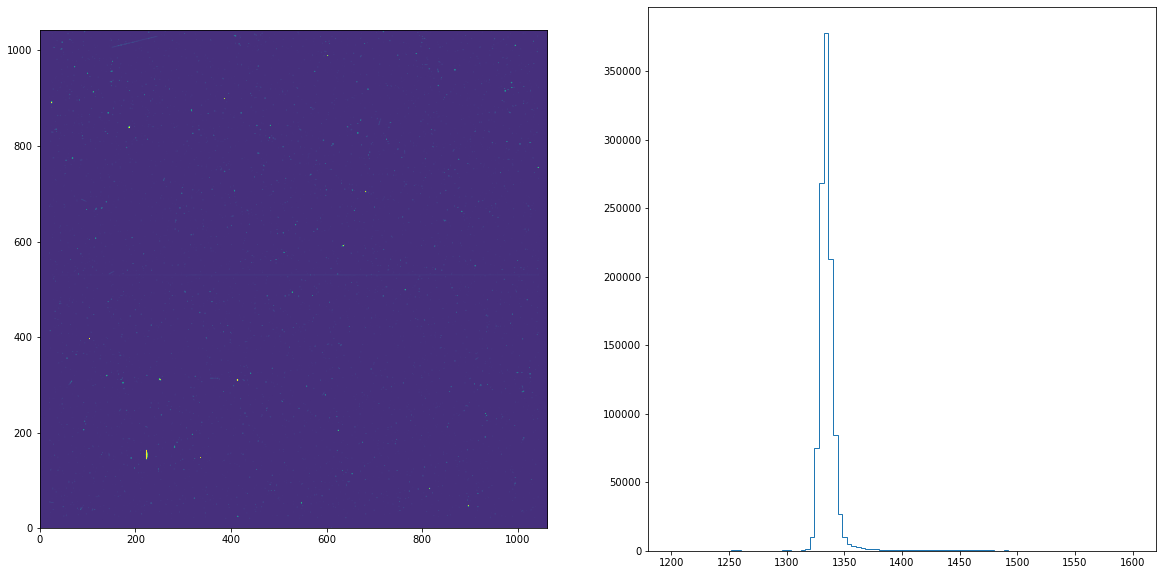

In [15]:
matplotlib.rcParams['figure.figsize'] = (20,10)
DQICORR = "./DQICORR/o5f301010_flt.fits"
with fits.open(DQICORR) as hdu:
    image = hdu[1].data
    flat = image.ravel()
    plt.subplot(1,2,1)
    plt.imshow(image,origin='lower',cmap="viridis",vmax=10000,vmin=0)
    plt.subplot(1,2,2)
    plt.hist(flat,bins=100,range=[1200,1600],histtype="step")
    print(np.min(flat))

In [ ]:
fits.getheader(DQICORR)

In [ ]:
fits.setval(raw,"BLEVCORR",value="PERFORM",ext=0)
os.mkdir("./BLEVCORR/")
stistools.calstis.calstis(raw,wavecal=wav,verbose=True,outroot="./BLEVCORR/")

In [ ]:
fits.info("./BLEVCORR/o5f301010_flt.fits")

In [ ]:
matplotlib.rcParams['figure.figsize'] = (20,10)
BLEVCORR = "./BLEVCORR/o5f301010_flt.fits"
with fits.open(BLEVCORR) as hdu:
    image = hdu[1].data
    flat = image.ravel()
    ex4 = hdu[4].data
    ex4_flat = ex4.ravel()
    plt.subplot(1,2,1)
    img = plt.imshow(image,origin='lower',cmap="RdBu_r",vmax=50,vmin=-50)
    plt.colorbar(img)
    plt.subplot(1,2,2)
    plt.hist(flat,bins=100,range=[-200,200],histtype="step",label="extension 1")
    plt.hist(ex4_flat,bins=100,range=[-200,200],histtype="step",label="extension 4")
    plt.legend(loc="best")
    print(np.min(flat))

In [ ]:
fits.setval(raw,"BIASCORR",value="PERFORM",ext=0)
os.mkdir("./BIASCORR/")
stistools.calstis.calstis(raw,wavecal=wav,verbose=True,outroot="./BIASCORR/")

In [ ]:
BIASCORR = "./BIASCORR/o5f301010_flt.fits"
with fits.open(BIASCORR) as hdu:
    image = hdu[4].data
    flat = image.ravel()
    plt.subplot(1,2,1)
    plt.imshow(image,origin='lower',cmap="viridis",vmax=10000,vmin=0)
    plt.subplot(1,2,2)
    plt.hist(flat,bins=100,range=[-200,200],histtype="step")
    print(np.min(flat))

In [ ]:
fits.setval(raw,"CRCORR",value="PERFORM",ext=0)
os.mkdir("./CRCORR/")
stistools.calstis.calstis(raw,wavecal=wav,verbose=True,outroot="./CRCORR/")

In [ ]:
CRCORR = "./CRCORR/o5f301010_crj.fits"
with fits.open(CRCORR) as hdu:
    image = hdu[1].data
    flat = image.ravel()
    plt.subplot(1,2,1)
    plt.imshow(image,origin='lower',cmap="viridis",vmax=200,vmin=-200)
    plt.subplot(1,2,2)
    plt.hist(flat,bins=100,range=[-200,200],histtype="step")
    print(np.min(flat))

In [ ]:
fits.setval(raw,"DARKCORR",value="PERFORM",ext=0)
os.mkdir("./DARKCORR/")
stistools.calstis.calstis(raw,wavecal=wav,verbose=True,outroot="./DARKCORR/")

In [ ]:
DARKCORR = "./DARKCORR/o5f301010_crj.fits"
with fits.open(DARKCORR) as hdu:
    image = hdu[1].data
    flat = image.ravel()
    plt.subplot(1,2,1)
    plt.imshow(image,origin='lower',cmap="viridis",vmax=200,vmin=-200)
    plt.subplot(1,2,2)
    plt.hist(flat,bins=100,range=[-200,200],histtype="step")
    print(np.min(flat))

In [ ]:
fits.setval(raw,"FLATCORR",value="PERFORM",ext=0)
os.mkdir("./FLATCORR/")
stistools.calstis.calstis(raw,wavecal=wav,verbose=True,outroot="./FLATCORR/")

In [ ]:
FLATCORR = "./FLATCORR/o5f301010_crj.fits"
with fits.open(FLATCORR) as hdu:
    image = hdu[1].data
    flat = image.ravel()
    plt.subplot(1,2,1)
    plt.imshow(image,origin='lower',cmap="viridis",vmax=200,vmin=-200)
    plt.subplot(1,2,2)
    plt.hist(flat,bins=100,range=[-200,200],histtype="step")
    print(np.median(flat))